<a href="https://colab.research.google.com/github/mayankbhaskar007/DeepLearningBook/blob/master/kullback_leibler_divergence(Chapter_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# From https://haphazardmethods.wordpress.com/2017/06/29/chapter-3-kullback-leibler-divergence/

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [0]:
def kullback_leibler(p_x, p_y):
    """
    compute the kullback-leibler divergence of two discrete probability distributions declared by the arrays p_x, p_y
    :param p_x:
    :param p_y:
    :return:
    """
    return np.array(p_x).dot(np.log(np.array(p_x)) - np.log(np.array(p_y)))

In [0]:
def gaussian_density(mu, sigma, xs):
    """
    1-dimensional gaussian distribution
    :param mu:
    :param sigma:
    :param xs:
    :return:
    """
    return (1 / (np.sqrt(2*np.pi*sigma))) * np.exp(- ((xs - mu)**2) / (2*sigma))

In [0]:
def function_p(xs, mus, sigmas, weight):
    """
    Mixture of two 1-dimensional gaussians
    :param xs:
    :param mus:
    :param sigmas:
    :param weight:
    :return:
    """
    gauss_A = gaussian_density(mus[0], sigmas[0], xs)
    gauss_B = gaussian_density(mus[1], sigmas[1], xs)
    gauss_C = weight * gauss_A + (1-weight) * gauss_B

    return gauss_C

In [0]:
xs = np.arange(-3, 11, 0.01)
mus = [0, 8]
sigmas = [1, 1]

In [0]:
min_p_q = np.inf
min_mu_sigma_p_q = ()
min_q_p = np.inf
min_mu_sigma_q_p = ()

# brute-force search for minimum KL-divergence
for mu in np.arange(min(mus), max(mus), 0.1):
    for sigma in np.arange(1, max(mus) - min(mus) + 1, 0.1):
        ps = function_p(xs, mus, sigmas, 0.5)
        qs = gaussian_density(mu, sigma, xs)
        value_p_q = kullback_leibler(ps, qs)
        if value_p_q < min_p_q:
            min_p_q = value_p_q
            min_mu_sigma_p_q = (mu, sigma)
        value_q_p = kullback_leibler(qs, ps)
        if value_q_p < min_q_p:
            min_q_p = value_q_p
            min_mu_sigma_q_p = (mu, sigma)
            
print ("KL p||q: ", min_p_q)
print ("argmin mu: %f , sigma: %f" %(min_mu_sigma_p_q[0], min_mu_sigma_p_q[1]))

print ("KL q||p: ", min_q_p)
print ("argmin mu: %f , sigma: %f" %(min_mu_sigma_q_p[0], min_mu_sigma_q_p[1]))

KL p||q:  85.77831554983037
argmin mu: 4.000000 , sigma: 8.900000
KL q||p:  69.21332502871111
argmin mu: 0.000000 , sigma: 1.000000


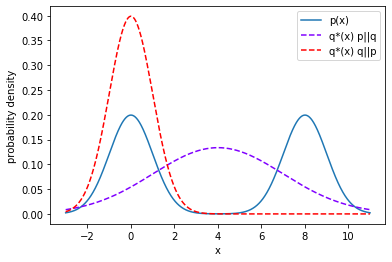

In [0]:
# plot the 3 distributions
colors = cm.rainbow(np.linspace(0, 1, 2))
plt.figure()
ax = plt.plot(xs, function_p(xs, mus, sigmas, 0.5), label='p(x)')
plt.draw()

ax2 = plt.plot(xs, gaussian_density(min_mu_sigma_p_q[0], min_mu_sigma_p_q[1], xs), color=colors[0],
               linestyle='dashed', label='q*(x) p||q')
plt.draw()
ax3 = plt.plot(xs, gaussian_density(min_mu_sigma_q_p[0], min_mu_sigma_q_p[1], xs), color=colors[1],
               linestyle='dashed', label='q*(x) q||p')
plt.draw()
plt.xlabel('x')
plt.ylabel('probability density')
plt.legend()
plt.show()